# EDA

### Importamos Librerias necesarias

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")

Cargamos el csv, hacemos un paneo general de la informacion, como se ve la tabla que fue previamente transformada para verificar su Memory Usage y describe para hacer un rapido chequeo sobre las variables numericas de nuestro dataset

In [4]:
df = pd.read_csv('df_final.csv', low_memory=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52707 entries, 0 to 52706
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      52707 non-null  object 
 1   id                         52707 non-null  int64  
 2   Action                     52707 non-null  int64  
 3   Adventure                  52707 non-null  int64  
 4   Animation &amp; Modeling   52707 non-null  int64  
 5   Audio Production           52707 non-null  int64  
 6   Casual                     52707 non-null  int64  
 7   Design &amp; Illustration  52707 non-null  int64  
 8   Early Access               52707 non-null  int64  
 9   Education                  52707 non-null  int64  
 10  Free to Play               52707 non-null  int64  
 11  Indie                      52707 non-null  int64  
 12  Massively Multiplayer      52707 non-null  int64  
 13  Photo Editing              52707 non-null  int

In [6]:
df['user_id'].head(40)

0               kube134
1     76561198030567998
2     76561198030567998
3     76561198030567998
4     76561198030567998
5     76561198030567998
6            jonasdbomb
7           washington_
8           washington_
9           washington_
10          washington_
11          washington_
12          washington_
13               Mastic
14               Mastic
15               Mastic
16               Mastic
17               Mastic
18               Mastic
19           advenger95
20           advenger95
21           advenger95
22    76561198003056556
23    76561198003056556
24    76561198085956238
25    76561198085956238
26    76561198085956238
27    76561198085956238
28           uradumbtit
29           uradumbtit
30    76561198020928326
31    76561198020928326
32    76561198020928326
33    76561198020928326
34            scroopy22
35            auzzie_96
36    76561198035363871
37              CHAAANG
38              CHAAANG
39    76561198084718144
Name: user_id, dtype: object

In [12]:
#Vista general del data
df.head(2)

,title,id,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,Education,...,playtime_2weeks,user_url,funny,last_edited,item_id,helpful,recommend,review,posted year,sentiment_score
0,Half-Life,70,1,0,0,0,0,0,0,0,...,0,http://steamcommunity.com/id/kube134,NaN,NaN,251990.0,1 of 1 people (100%) found this review helpful,True,It's good to be a magical queen... if you surv...,2014.0,0
1,Half-Life,70,1,0,0,0,0,0,0,0,...,0,http://steamcommunity.com/profiles/76561198030...,2 people found this review funny,NaN,332800.0,194 of 282 people (69%) found this review helpful,True,10/10 would take kids here for birthday,2014.0,0


In [7]:
#Variables numéricas
df_num= df.select_dtypes(include = (int,float))
df_num.drop(columns=['Action', 'Adventure',
       'Audio Production', 'Casual', 'Design &amp; Illustration',
       'Early Access', 'Education', 'Free to Play', 'Indie', 'Animation &amp; Modeling',
       'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
       'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Web Publishing'], inplace=True)

In [14]:
df.columns

Index(['title', 'id', 'Action', 'Adventure', 'Animation &amp; Modeling',
       'Audio Production', 'Casual', 'Design &amp; Illustration',
       'Early Access', 'Education', 'Free to Play', 'Indie',
       'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
       'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Web Publishing', 'year', 'user_id', 'items_count',
       'steam_id', 'playtime_forever', 'playtime_2weeks', 'user_url', 'funny',
       'last_edited', 'item_id', 'helpful', 'recommend', 'review',
       'posted year', 'sentiment_score'],
      dtype='object')

In [15]:
#Describe para un analisis rápido de la data. 
df_num.describe()

,id,year,items_count,steam_id,playtime_forever,playtime_2weeks,item_id,posted year,sentiment_score
count,52707.000000,52707.000000,52707.000000,5.270700e+04,52707.000000,52707.000000,52682.000000,43522.000000,52707.000000
mean,5963.007418,2004.799628,146.406132,7.656120e+16,4638.936289,23.420039,170817.665066,2014.155508,0.327034
std,25881.730852,2.953082,233.530828,3.839649e+07,13890.877307,209.629254,132090.477195,0.843346,0.739334
min,10.000000,1990.000000,1.000000,7.656120e+16,0.000000,0.000000,10.000000,2010.000000,0.000000
25%,220.000000,2004.000000,55.000000,7.656120e+16,82.000000,0.000000,9480.000000,2014.000000,0.000000
50%,320.000000,2005.000000,95.000000,7.656120e+16,559.000000,0.000000,218230.000000,2014.000000,0.000000
75%,4000.000000,2006.000000,167.000000,7.656120e+16,2751.000000,0.000000,263020.000000,2015.000000,0.000000
max,339610.000000,2017.000000,7762.000000,7.656120e+16,356217.000000,9089.000000,527340.000000,2015.000000,2.000000


## Top juegos
El top de juegos con reviews entre usuarios de nuestro dataset

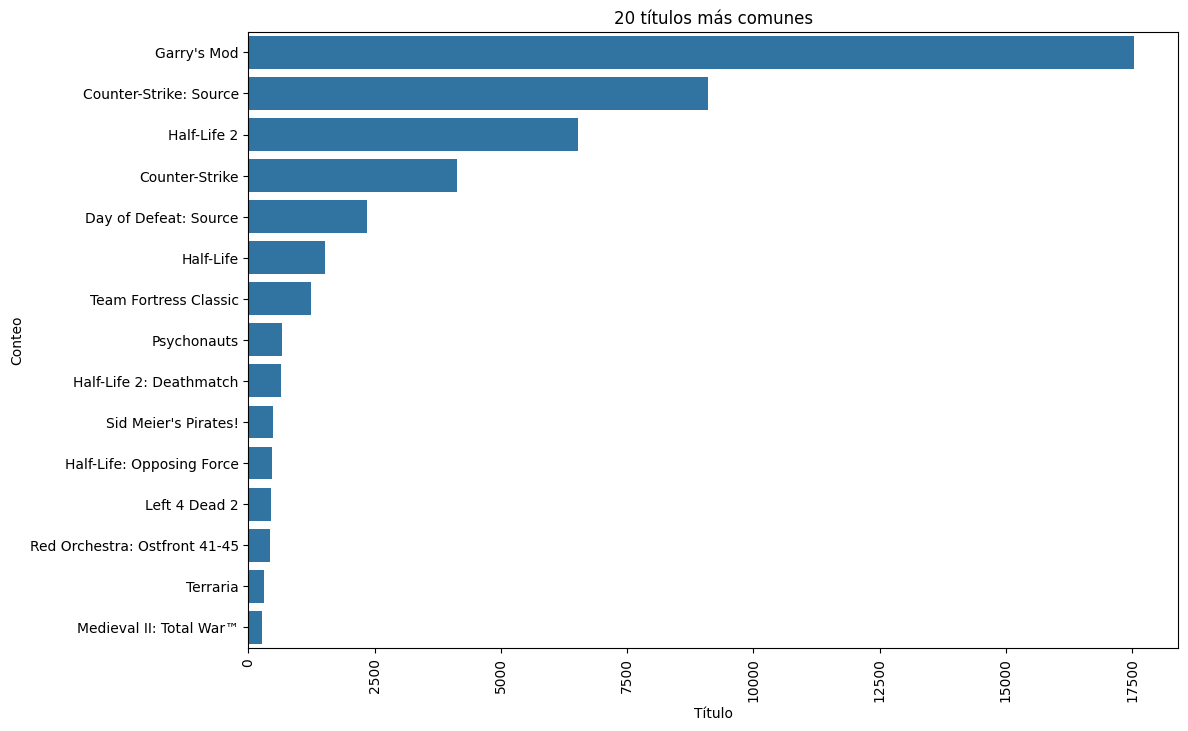

In [16]:
# Obtener el top 20 de titulos
top_titles = df['title'].value_counts().nlargest(15)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(y=top_titles.index, x=top_titles.values)
plt.xlabel('Título')
plt.ylabel('Conteo')
plt.title('20 títulos más comunes')
plt.xticks(rotation=90)
plt.show()

Concluciones: Tras analizar detalladamente las estadísticas de compra de juegos, se observa que los títulos que lideran en términos de popularidad y adquisición por parte de los usuarios son Garry's Mod, Counter Strike y Half-Life 2. 

## Horas de juego por categoria en cada año

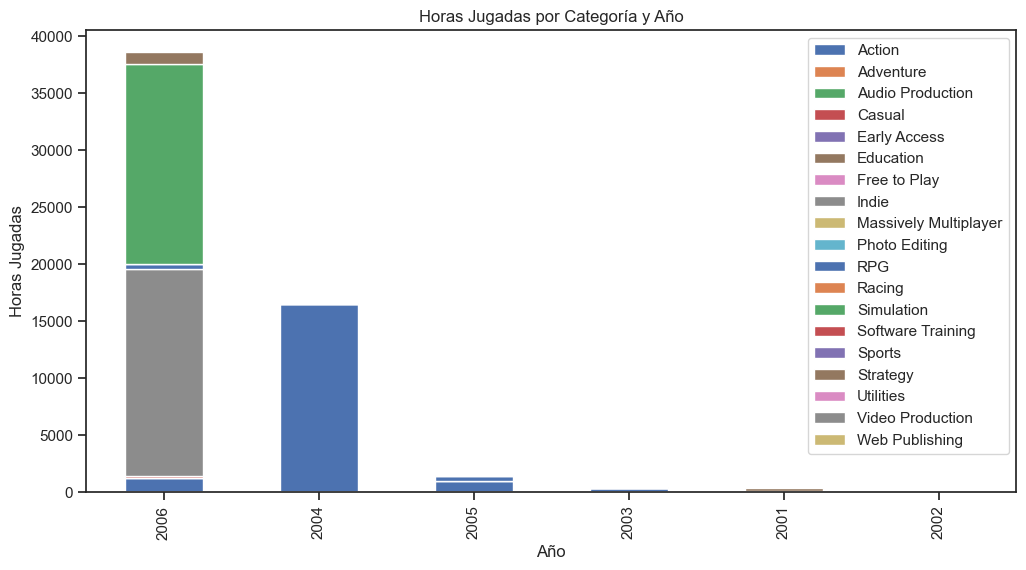

In [23]:

genres = ['Action', 'Adventure', 'Audio Production', 'Casual',
             'Early Access', 'Education', 'Free to Play', 'Indie',
             'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
             'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Web Publishing']

relevant_columns = ['year', 'playtime_forever'] + genres
df_filtered = df[relevant_columns].copy()

# Filtrar los datos por años específicos (ejemplo: 2001 a 2006)
df_filtered = df_filtered[(df_filtered['year'] >= 2001) & (df_filtered['year'] <= 2006)]

# Agrupar por año y sumar las horas jugadas por categoría
df_grouped = df_filtered.groupby('year')[genres].sum()
df_grouped['total_playtime'] = df_grouped[genres].sum(axis=1)
df_grouped = df_grouped.sort_values('total_playtime', ascending=False)

# Plotear el gráfico de barras apiladas
df_grouped[genres].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Año')
plt.ylabel('Horas Jugadas')
plt.title('Horas Jugadas por Categoría y Año')
plt.legend(loc='upper right')
plt.show()


- Conclusión: Tras analizar detenidamente los datos, se observa que el año 2006 destaca como el período con la mayor cantidad de horas registradas de juego. Además, al examinar los géneros más predominantes, se evidencia que los jugadores tienen una preferencia notable por los géneros de Indie y Simulación.

## Dispersion de horas de juego 
Grafico de dispersion para mostrar los años que tuvieron la mayor cantidad de horas de juego para cada usuario

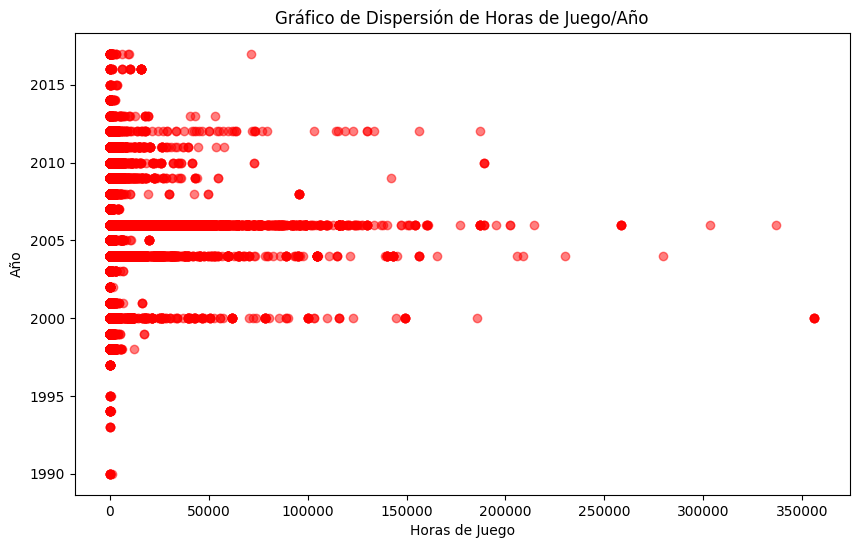

In [18]:
plt.figure(figsize=(10, 6))

# Crea el scatter plot de playtime vs. price
plt.scatter(df_num['playtime_forever'], df_num['year'], color='red', alpha=0.5)

# Personaliza el gráfico con etiquetas y título
plt.title('Gráfico de Dispersión de Horas de Juego/Año')
plt.xlabel('Horas de Juego')
plt.ylabel('Año');

Conclusión: El gráfico de dispersión de horas de juego versus año proporciona una representación visual intrigante de la relación entre la duración de juego y el año de lanzamiento. A primera vista, se aprecia una dispersión diversa de puntos que reflejan la distribución de las horas de juego a lo largo de diferentes años. 